In [332]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

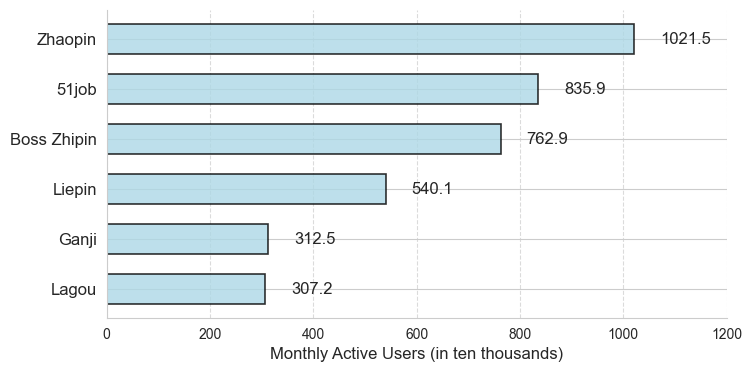

In [333]:
platforms = ['Zhaopin', '51job', 'Boss Zhipin', 'Liepin', 'Ganji', 'Lagou']
users = [1021.5, 835.9, 762.9, 540.1, 312.5, 307.2]

# Sort the data in ascending order
platforms_sorted, users_sorted = zip(*sorted(zip(platforms, users), key=lambda x: x[1]))

fig, ax = plt.subplots(figsize=(8, 4))

# Create the horizontal bar chart
ax.barh(platforms_sorted, users_sorted, height=0.6, align='center', alpha=0.8, edgecolor='black', linewidth=1.2, color='#ADD8E6')

# Add the data labels
for i, v in enumerate(users_sorted):
    ax.text(v + 50, i, str(v), ha='left', va='center', fontsize=12)

# Set the chart title and axis labels
# ax.set_title('Monthly Active Users on Chinese Internet Recruitment Platforms (May 2021)', fontsize=14, fontweight='bold')
ax.set_xlabel('Monthly Active Users (in ten thousands)', fontsize=12)

# Add the y-axis labels
ax.set_yticks(range(len(platforms_sorted)))
ax.set_yticklabels(platforms_sorted, fontsize=12)

# Set the x-axis tick marks
ax.set_xticks(range(0, int(max(users_sorted))+201, 200))

# Hide the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add horizontal grid lines and set transparency to 0.7
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


In [334]:
# Read the CSV files
finance_data = pd.read_csv('Finance_cleaned_file.csv')
internet_data = pd.read_csv('Internet_cleaned_file.csv')

# Add a new 'industry' column based on the source file
finance_data['Industry'] = 'Finance'
internet_data['Industry'] = 'Internet'

# Merge the dataframes
merged_data = pd.concat([finance_data, internet_data], ignore_index=True)

# Save the merged data to a new CSV file
merged_data.to_csv('merged.csv', index=False)

In [335]:
# Load the data from CSV file
df = pd.read_csv('merged.csv')

# Group data by Industry and eduBack_en, and get the count of unique job postings in each group
city_ind_counts = df.groupby(['Industry', 'city_en'])['name'].size()

# Compute the total count for each industry
ind_total_counts = df.groupby(['Industry'])['name'].size()

# Compute the percentage for each group
city_ind_perc = round(city_ind_counts / ind_total_counts * 100,2)

# Print the results for Internet and Finance industries
print('Percentage of job postings by cities in Internet and Finance industries:')
print(city_ind_perc.loc[['Internet', 'Finance']])


Percentage of job postings by cities in Internet and Finance industries:
Industry  city_en  
Finance   Beijing      33.82
          Guangzhou    14.56
          Hangzhou     13.80
          Shanghai     20.71
          Shenzhen     17.10
Internet  Beijing      20.83
          Guangzhou    18.92
          Hangzhou     14.35
          Shanghai     21.84
          Shenzhen     24.06
Name: name, dtype: float64


In [336]:
# Education Level

# Group data by Industry and eduBack_en, and get the count of unique job postings in each group
edu_ind_counts = df.groupby(['Industry', 'eduBack_en'])['name'].size()

# Compute the total count for each industry
ind_total_counts = df.groupby(['Industry'])['name'].size()

# Compute the percentage for each group
edu_ind_perc = round(edu_ind_counts / ind_total_counts * 100,2)

# Print the results for Internet and Finance industries
print('Percentage of distinct job postings in each education group for Internet and Finance industries:')
print(edu_ind_perc.loc[['Internet', 'Finance']])


Percentage of distinct job postings in each education group for Internet and Finance industries:
Industry  eduBack_en           
Finance   Bachelor                 34.59
          Doctor                    0.11
          High School and below     5.74
          Junior College           42.12
          Master                    4.28
          No Education Required    12.44
          Technical Secondary       0.72
Internet  Bachelor                 49.86
          Doctor                    0.37
          High School and below     2.16
          Junior College           32.38
          Master                    4.95
          No Eduction Required      7.95
          Technical Secondary       2.33
Name: name, dtype: float64


In [337]:
# Work Experience
df = pd.read_csv('merged.csv')
# Group data by Industry and eduBack_en, and get the count of unique job postings in each group
exp_ind_counts = df.groupby(['Industry', 'exp_en'])['name'].size()

# Compute the total count for each industry
ind_total_counts = df.groupby(['Industry'])['name'].size()

# Compute the percentage for each group
exp_ind_perc = round(exp_ind_counts / ind_total_counts * 100,2)

# Print the results for Internet and Finance industries
print('Percentage of work experience group in Internet and Finance industries:')
print(exp_ind_perc.loc[['Internet', 'Finance']])


Percentage of work experience group in Internet and Finance industries:
Industry  exp_en                     
Finance   1-3 years                      28.15
          3-5 years                      12.79
          5-10 years                      5.64
          Less than 1 year                2.12
          No Work Experience Required    50.70
          Over 10 years                   0.61
Internet  1-3 years                      32.60
          3-5 years                      27.11
          5-10 years                     10.75
          Less than 1 year                1.59
          No Work Experience Required    27.28
          Over 10 years                   0.67
Name: name, dtype: float64


In [338]:
# Company Scale
df = pd.read_csv('merged.csv')
def map_scale_to_group(scale_en):
    if 'Less than' in scale_en:
        return '<100'
    elif '20-' in scale_en:
        return '<100'
    elif '100-' in scale_en:
        return '100-300'
    elif 'Other' in scale_en:
        return 'Other'
    else:
        return '>300'

# Create a new column 'scale_group' with the merged categories using the map() function
df['scale_group'] = df['scale_en'].map(map_scale_to_group)


# Group data by Industry and eduBack_en, and get the count of unique job postings in each group
sca_ind_counts = df.groupby(['Industry', 'scale_group'])['name'].size()

# Compute the total count for each industry
ind_total_counts = df.groupby(['Industry'])['name'].size()

# Compute the percentage for each group
sca_ind_perc = round(sca_ind_counts / ind_total_counts * 100,2)

# Print the results for Internet and Finance industries
print('Percentage of company scale group in Internet and Finance industries:')
print(sca_ind_perc.loc[['Internet', 'Finance']])

Percentage of company scale group in Internet and Finance industries:
Industry  scale_group
Finance   100-300        17.04
          <100           19.23
          >300           62.58
          Other           1.15
Internet  100-300        22.36
          <100           29.28
          >300           47.65
          Other           0.71
Name: name, dtype: float64


In [339]:
# Company Type
co_map={'民营':'Private', '上市公司':'Public Company', '股份制企业':'Joint-Stock enterprise', '国企':'State-Owned Enterprise', '合资':'Joint Venture', '外商独资':'Wholly Foreign-Owned', '其他':'Other', '事业单位':'Public Institution','银行':'Bank'}
df['Comp_en']=df['companyType'].map(co_map)

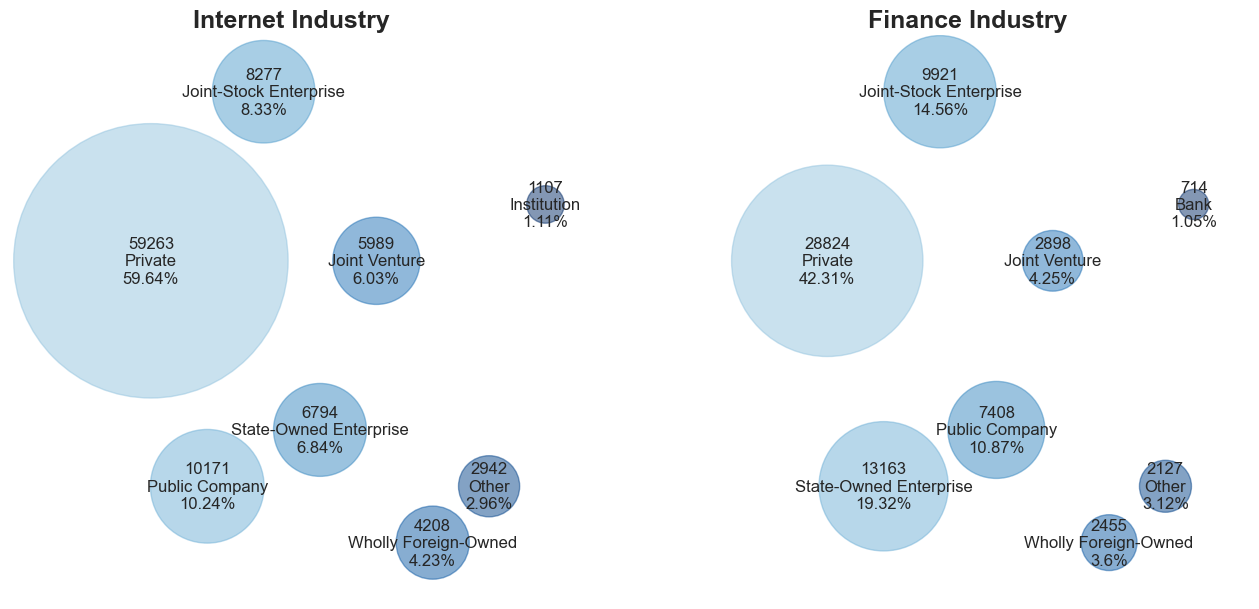

In [340]:
values_int = [59263, 10171, 8277, 6794, 5989, 4208, 2942, 1107]
val_int = [59263, 10171, 8277, 6794, 5989, 4208, 2942, 1107, 296, 155, 32, 32, 31, 30, 27, 19]
total = sum(val_int)
percent_int = [f"{round(value/total*100, 2)}%" for value in values_int]
labels_int = ['Private', 'Public Company', 'Joint-Stock Enterprise', 'State-Owned Enterprise', 'Joint Venture', 'Wholly Foreign-Owned', 'Other', 'Institution']
sort_idx_int = np.argsort(values_int)[::-1]

# Manually set the position of each circle, from left to right in descending order
coords_int = [[0.25, 0.6], [0.35, 0.2], [0.45, 0.9], [0.55, 0.3], [0.65, 0.6], [0.75, 0.1], [0.85, 0.2], [0.95, 0.7]]

# Calculate the radius of each circle, proportional to the value
radii_int = np.sqrt(np.array(values_int)[sort_idx_int]) * 0.001

values_fin = [28824, 13163, 9921, 7408, 2898, 2127, 2455, 714]
val_fin = [28824, 13163, 9921, 7408, 2898, 2127, 2455, 714, 189, 164, 138, 60, 22, 19, 15, 4]
total = sum(val_fin)

percent_fin = [f"{round(value/total*100, 2)}%" for value in values_fin]
labels_fin = ['Private', 'State-Owned Enterprise', 'Joint-Stock Enterprise', 'Public Company', 'Joint Venture', 'Other', 'Wholly Foreign-Owned', 'Bank']
sort_idx_fin = np.argsort(values_fin)[::-1]

# Manually set the position of each circle, from left to right in descending order
coords_fin = [[0.25, 0.6], [0.35, 0.2], [0.45, 0.9], [0.55, 0.3], [0.65, 0.6], [0.75, 0.1], [0.85, 0.2], [0.9, 0.7], [0.95, 0.2]]

# Calculate the radius of each circle, proportional to the value
radii_fin = np.sqrt(np.array(values_fin)[sort_idx_fin]) * 0.001

# Use a colormap, setting colors to gradually shift from light blue to dark blue
cmap = plt.cm.Blues
colors = cmap(np.linspace(0.4, 1, len(sort_idx_fin)))

# Create circle plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
ax1.axis('off')
ax1.set_aspect('equal')
ax1.set_title('Internet Industry', fontsize=18, fontweight='bold')

for i in range(len(sort_idx_int)):
    circle = plt.Circle(coords_int[i], radii_int[i], alpha=0.5, color=colors[i])
    ax1.add_artist(circle)
    ax1.annotate(str(values_int[sort_idx_int[i]])+'\n'+labels_int[sort_idx_int[i]]+'\n'+str(percent_int[sort_idx_int[i]]), xy=coords_int[i], ha='center', va='center', fontsize=12)

ax2.axis('off')
ax2.set_aspect('equal')
ax2.set_title('Finance Industry', fontsize=18, fontweight='bold')

for i in range(len(sort_idx_fin)):
    circle = plt.Circle(coords_fin[i], radii_fin[i], alpha=0.5, color=colors[i])
    ax2.add_artist(circle)
    ax2.annotate(str(values_fin[sort_idx_fin[i]])+'\n'+labels_fin[sort_idx_fin[i]]+'\n'+str(percent_fin[sort_idx_fin[i]]), xy=coords_fin[i], ha='center', va='center', fontsize=12)

plt.show()

In [341]:
print(percent_fin)
print(labels_fin)
print(percent_int)
print(labels_int)

['42.31%', '19.32%', '14.56%', '10.87%', '4.25%', '3.12%', '3.6%', '1.05%']
['Private', 'State-Owned Enterprise', 'Joint-Stock Enterprise', 'Public Company', 'Joint Venture', 'Other', 'Wholly Foreign-Owned', 'Bank']
['59.64%', '10.24%', '8.33%', '6.84%', '6.03%', '4.23%', '2.96%', '1.11%']
['Private', 'Public Company', 'Joint-Stock Enterprise', 'State-Owned Enterprise', 'Joint Venture', 'Wholly Foreign-Owned', 'Other', 'Institution']


(0.0, 40.0)

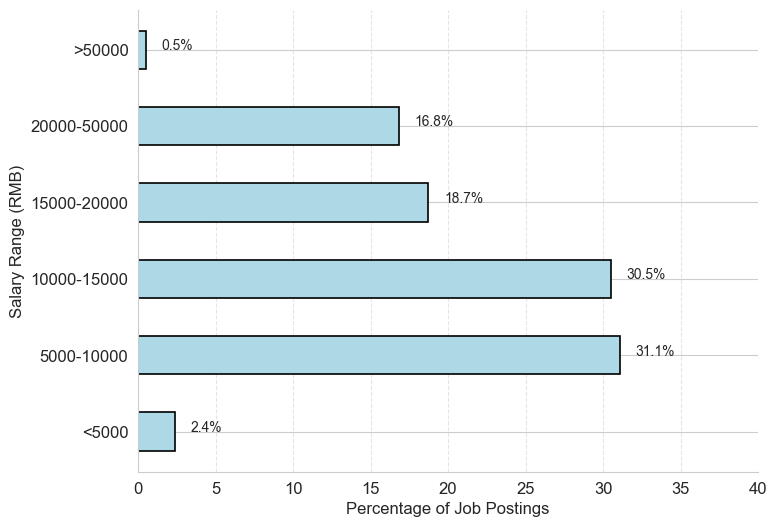

In [342]:
# Salary Analysis

# Set plot style
sns.set_style("whitegrid")

# Create the first figure and subplot
fig1, ax1 = plt.subplots(figsize=(8, 6))

# Set plot title and axis labels for the first subplot
ax1.set_ylabel('Salary Range (RMB)', fontsize=12)
salary_order=['<5000', '5000-10000', '10000-15000', '15000-20000', '20000-50000', '>50000']
# Group data by Salary Range and count the number of companies in each group
internet_grouped = df[df['Industry'] == 'Internet'].groupby('salary_label')['salary_label'].count().reset_index(name='count')

# Calculate percentage for each group
internet_sum_by_salary_label = internet_grouped['count'].sum()
internet_grouped['percentage'] = round(internet_grouped['count'] / internet_sum_by_salary_label * 100, 2)

# Add the salary_label column
internet_grouped['salary_label'] = internet_grouped['salary_label'].astype('category').cat.set_categories(salary_order)

# Reorder categories according to salary_order
internet_grouped = internet_grouped.sort_values('salary_label', ascending=False)

# Create the horizontal bar plot for the first subplot
ax1.barh(y='salary_label', width='percentage', height=0.5, color='#ADD8E6', edgecolor='black', linewidth=1.2, data=internet_grouped)

# Set the x-axis label and title
ax1.set_xlabel('Percentage of Job Postings', fontsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.grid(axis='x', linestyle='--', alpha=0.5)

# Add percentage values to each bar
for i, v in enumerate(internet_grouped['percentage']):
    ax1.text(v + 1, i, f'{v:.1f}%', fontsize=10)

# Invert y-axis to show salary ranges from top to bottom
ax1.invert_yaxis()
ax1.set_xlim([0, 40])


In [343]:
salary_order = ['<5000', '5000-10000', '10000-15000', '15000-20000', '20000-50000', '>50000']

internet_grouped = df[df['Industry'] == 'Internet'].groupby(['industry_category', 'salary_label'])['salary_label'].count().reset_index(name='count')

internet_grouped['percentage'] = internet_grouped.groupby('industry_category')['count'].apply(lambda x: ((x / x.sum()) * 100).round(2))

internet_grouped = internet_grouped.sort_values(['industry_category', 'salary_label'], ascending=[True, True])

print(internet_grouped)


   industry_category salary_label  count  percentage
0               Data  10000-15000    285       24.78
1               Data  15000-20000    169       14.70
2               Data  20000-50000    317       27.57
3               Data   5000-10000    323       28.09
4               Data        <5000     34        2.96
5               Data       >50000     22        1.91
6             Design  10000-15000   1696       26.98
7             Design  15000-20000    496        7.89
8             Design  20000-50000    250        3.98
9             Design   5000-10000   3294       52.39
10            Design        <5000    537        8.54
11            Design       >50000     14        0.22
12       Development  10000-15000   6470       26.70
13       Development  15000-20000   7533       31.09
14       Development  20000-50000   7899       32.60
15       Development   5000-10000   1941        8.01
16       Development        <5000    116        0.48
17       Development       >50000    270      

In [344]:
salary_order = ['<5000', '5000-10000', '10000-15000', '15000-20000', '20000-50000', '>50000']

internet_grouped = df[df['Industry'] == 'Finance'].groupby(['industry_category', 'salary_label'])['salary_label'].count().reset_index(name='count')

internet_grouped['percentage'] = internet_grouped.groupby('industry_category')['count'].apply(lambda x: ((x / x.sum()) * 100).round(2))

internet_grouped = internet_grouped.sort_values(['industry_category', 'salary_label'], ascending=[True, True])

print(internet_grouped)


   industry_category salary_label  count  percentage
0            Banking  10000-15000   2008       37.05
1            Banking  15000-20000    763       14.08
2            Banking  20000-50000   1192       21.99
3            Banking   5000-10000   1354       24.98
4            Banking        <5000     53        0.98
5            Banking       >50000     50        0.92
6          Insurance  10000-15000   1293       35.31
7          Insurance  15000-20000    366        9.99
8          Insurance  20000-50000    498       13.60
9          Insurance   5000-10000   1434       39.16
10         Insurance        <5000     50        1.37
11         Insurance       >50000     21        0.57
12        Investment  10000-15000   1983       30.66
13        Investment  15000-20000   1069       16.53
14        Investment  20000-50000   1603       24.79
15        Investment   5000-10000   1633       25.25
16        Investment        <5000     96        1.48
17        Investment       >50000     83      

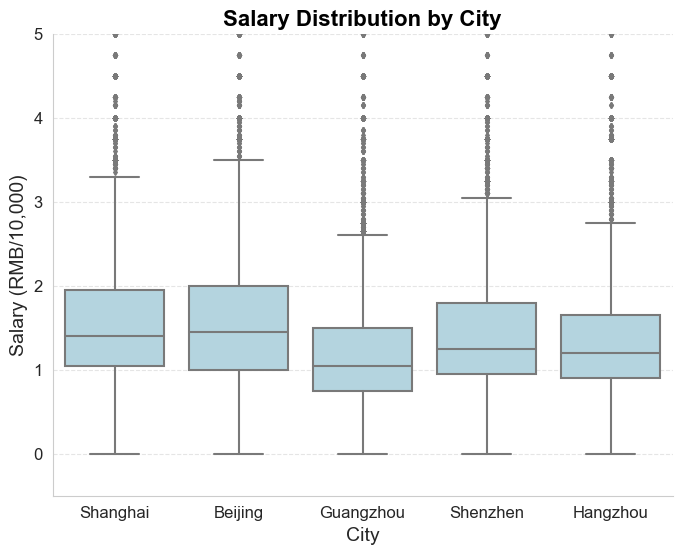

In [345]:
# Map city IDs to city names
city_en = {530: 'Beijing', 538: 'Shanghai', 763: 'Guangzhou', 765: 'Shenzhen', 653: 'Hangzhou'}
df['city_en'] = df['city_id'].map(city_en)

# Set plot style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette(['#ADD8E6'])

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='city_en', y='avg_w', data=df, ax=ax, palette=colors, 
            linewidth=1.5, fliersize=3)

# Set plot title and axis labels
ax.set_title('Salary Distribution by City', fontsize=16, color='black', fontweight='bold')
ax.set_xlabel('City', fontsize=14)
ax.set_ylabel('Salary (RMB/10,000)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust y-axis limits
ax.set_ylim([-0.5, 5])

# Set plot background color and save figure
fig.patch.set_facecolor('white')


In [346]:
# Group data by Industry and eduBack_en, and get the count of unique job postings in each group
sal_ind_counts = df.groupby(['Industry', 'salary_label'])['name'].size()

# Compute the total count for each industry
ind_total_counts = df.groupby(['Industry'])['name'].size()

# Compute the percentage for each group
sal_ind_perc = round(sal_ind_counts / ind_total_counts * 100,2)

# Print the results for Internet and Finance industries
print('Percentage of distinct job postings in each salary label for Internet and Finance industries:')
print(sal_ind_perc.loc[['Internet', 'Finance']])

Percentage of distinct job postings in each salary label for Internet and Finance industries:
Industry  salary_label
Finance   10000-15000     34.31
          15000-20000     16.06
          20000-50000     17.93
          5000-10000      27.94
          <5000            2.85
          >50000           0.90
Internet  10000-15000     29.31
          15000-20000     18.01
          20000-50000     16.15
          5000-10000      29.88
          <5000            2.26
          >50000           0.50
Name: name, dtype: float64


In [347]:
df = pd.read_csv('Internet_cleaned_file.csv')
# Map city IDs to city names
city_en = {530: 'Beijing', 538: 'Shanghai', 763: 'Guangzhou', 765: 'Shenzhen', 653: 'Hangzhou'}
df['city_en'] = df['city_id'].map(city_en)

# Calculate median salaries by city
medians = df.groupby('city_en')['avg_w'].median()

# Calculate median salaries by city
# Display each median value with corresponding city
for city, median in medians.items():
    print(f"Internet: Median salary in {city}: {median}")

Internet: Median salary in Beijing: 1.5
Internet: Median salary in Guangzhou: 1.0
Internet: Median salary in Hangzhou: 1.2
Internet: Median salary in Shanghai: 1.4
Internet: Median salary in Shenzhen: 1.3


In [348]:
df = pd.read_csv('Finance_cleaned_file.csv')
# Map city IDs to city names
city_en = {530: 'Beijing', 538: 'Shanghai', 763: 'Guangzhou', 765: 'Shenzhen', 653: 'Hangzhou'}
df['city_en'] = df['city_id'].map(city_en)

# Calculate median salaries by city
medians = df.groupby('city_en')['avg_w'].median()

# Calculate median salaries by city
# Display each median value with corresponding city
for city, median in medians.items():
    print(f"Finance: Median salary in {city}: {median}")

Finance: Median salary in Beijing: 1.35
Finance: Median salary in Guangzhou: 1.15
Finance: Median salary in Hangzhou: 1.2
Finance: Median salary in Shanghai: 1.45
Finance: Median salary in Shenzhen: 1.25


In [349]:
df = pd.read_csv('Internet_cleaned_file.csv')
# Calculate median salaries by work experience
medians = df.groupby('exp_en')['avg_w'].median()

# Calculate median salaries by city
# Display each median value with corresponding work experience
for city, median in medians.items():
    print(f"Internet: Median salary in {city}: {median}")

Internet: Median salary in 1-3 years: 1.1
Internet: Median salary in 3-5 years: 1.6
Internet: Median salary in 5-10 years: 2.0
Internet: Median salary in Less than 1 year: 0.8
Internet: Median salary in No Work Experience Required: 1.0
Internet: Median salary in Over 10 years: 2.7


In [350]:
df = pd.read_csv('Finance_cleaned_file.csv')
# Calculate median salaries by work experience
medians = df.groupby('exp_en')['avg_w'].median()

# Calculate median salaries by city
# Display each median value with corresponding  work experience
for city, median in medians.items():
    print(f"Finance: Median salary in {city}: {median}")

Finance: Median salary in 1-3 years: 1.2
Finance: Median salary in 3-5 years: 1.6
Finance: Median salary in 5-10 years: 2.25
Finance: Median salary in Less than 1 year: 1.1
Finance: Median salary in No Work Experience Required: 1.2
Finance: Median salary in Over 10 years: 3.25


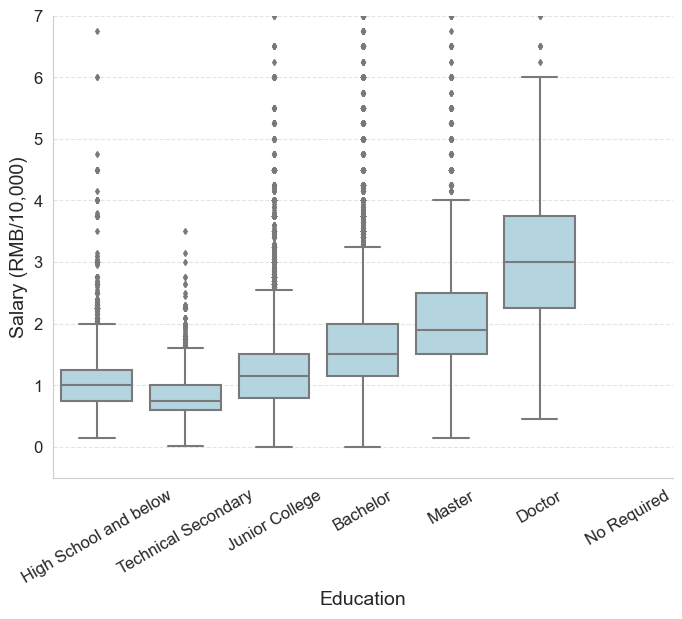

In [351]:
df = pd.read_csv('merged.csv')

# Set plot style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette(['#ADD8E6'])

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
# Define the order of the x-axis labels
edu_order = ['High School and below', 'Technical Secondary','Junior College', 'Bachelor', 'Master', 'Doctor','No Required']

# Create the boxplot with the specified order of the x-axis labels
sns.boxplot(x='eduBack_en', y='avg_w', data=df, ax=ax, palette=colors, 
            linewidth=1.5, fliersize=3, order=edu_order)

# Set plot title and axis labels
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Salary (RMB/10,000)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12,rotation=30)
# Adjust y-axis limits
ax.set_ylim([-0.5, 7])

# Set plot background color and save figure
fig.patch.set_facecolor('white')

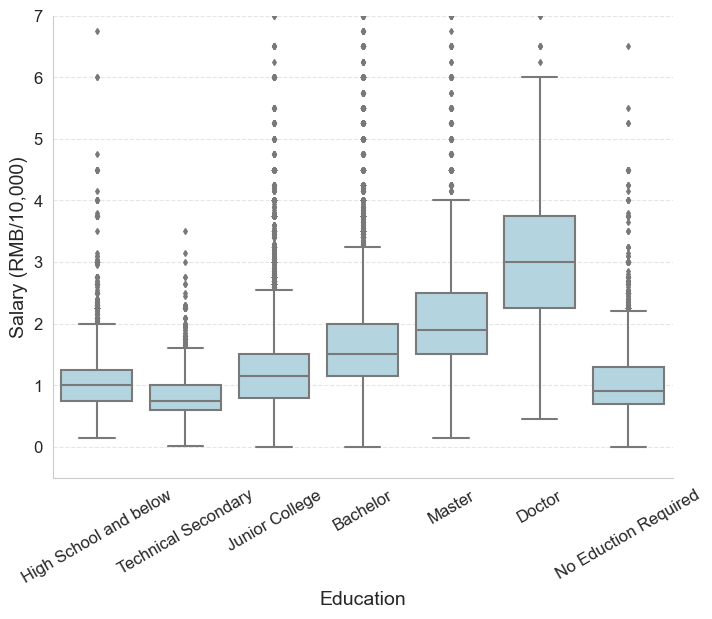

In [352]:
# Load data from csv file
df = pd.read_csv('merged.csv')

# Set plot style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette(['#ADD8E6'])

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
# Define the order of the x-axis labels
edu_order = ['High School and below', 'Technical Secondary','Junior College', 'Bachelor', 'Master', 'Doctor','No Eduction Required']

# Create the boxplot with the specified order of the x-axis labels
sns.boxplot(x='eduBack_en', y='avg_w', data=df, ax=ax, palette=colors, 
            linewidth=1.5, fliersize=3, order=edu_order)

# Set plot title and axis labels
ax.set_xlabel('Education', fontsize=14)
ax.set_ylabel('Salary (RMB/10,000)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)
# Adjust y-axis limits
ax.set_ylim([-0.5, 7])

# Set plot background color and save figure
fig.patch.set_facecolor('white')


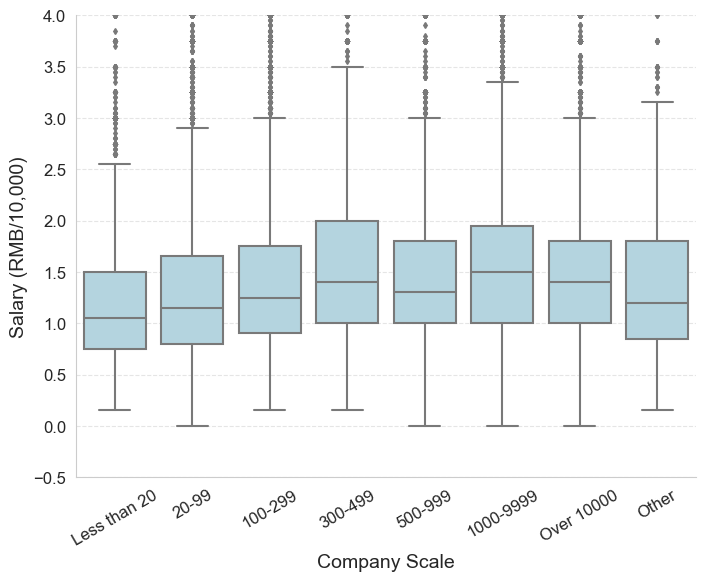

In [353]:
# Load data from csv file
df = pd.read_csv('merged.csv')

# Define order of x-axis categories
scale_order = ['Less than 20', '20-99', '100-299', '300-499', '500-999', '1000-9999', 'Over 10000', 'Other']

# Convert scale variable to ordered categorical type
df['scale_code'] = pd.Categorical(df['scale_en'], categories=scale_order, ordered=True)

# Set plot style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette(['#ADD8E6'])

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='scale_code', y='avg_w', data=df, ax=ax, palette=colors, 
            linewidth=1.5, fliersize=3)

# Set plot title and axis labels
ax.set_xlabel('Company Scale', fontsize=14)
ax.set_ylabel('Salary (RMB/10,000)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)
# Adjust y-axis limits
ax.set_ylim([-0.5, 4])

# Set plot background color and save figure
fig.patch.set_facecolor('white')


In [354]:
print(df['exp_en'])

0                          5-10 years
1                           3-5 years
2         No Work Experience Required
3                           1-3 years
4                           1-3 years
                     ...             
178125    No Work Experience Required
178126    No Work Experience Required
178127    No Work Experience Required
178128                      1-3 years
178129    No Work Experience Required
Name: exp_en, Length: 178130, dtype: object


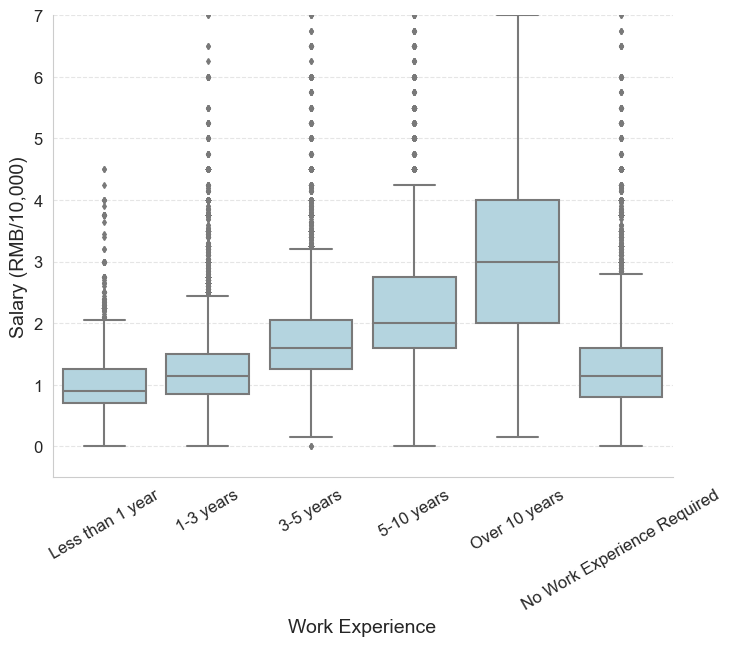

In [355]:
# Load data from csv file
df = pd.read_csv('merged.csv')

# Set plot style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette(['#ADD8E6'])

exp_order = ['Less than 1 year', '1-3 years', '3-5 years', '5-10 years', 
             'Over 10 years','No Work Experience Required']

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='exp_en', y='avg_w', data=df, ax=ax, palette=colors, 
            linewidth=1.5, fliersize=3, order=exp_order)

# Set plot title and axis labels
ax.set_xlabel('Work Experience', fontsize=14)
ax.set_ylabel('Salary (RMB/10,000)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)
# Adjust y-axis limits
ax.set_ylim([-0.5, 7])

# Set plot background color and save figure
fig.patch.set_facecolor('white')


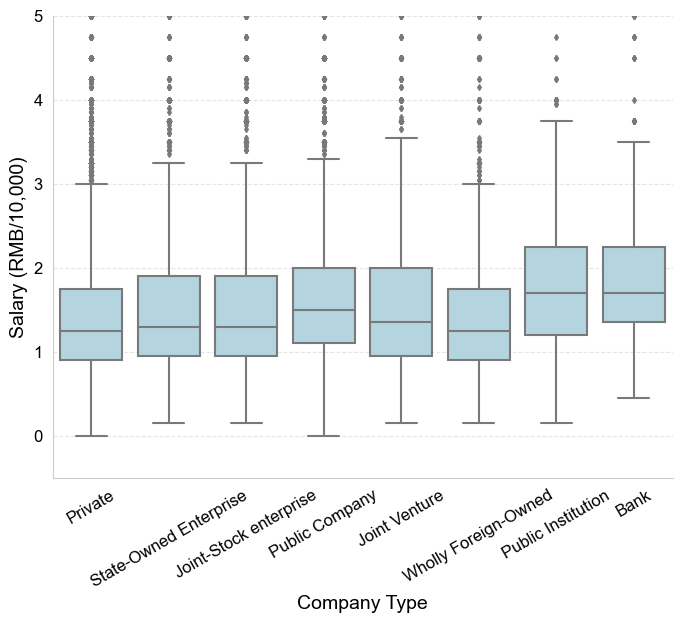

In [356]:
# Set plot style
sns.set_style("whitegrid")

# Set color palette
colors = sns.color_palette(['#ADD8E6'])

exp_order = ['Private', 'State-Owned Enterprise', 'Joint-Stock enterprise', 'Public Company', 
             'Joint Venture','Wholly Foreign-Owned','Public Institution','Bank']

# Create the boxplot
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Comp_en', y='avg_w', data=df, ax=ax, palette=colors, 
            linewidth=1.5, fliersize=3, order=exp_order)

# Set plot title and axis labels
ax.set_xlabel('Company Type', fontsize=14, color='black')
ax.set_ylabel('Salary (RMB/10,000)', fontsize=14, color='black')
ax.tick_params(axis='both', which='major', labelsize=12, colors='black')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='y', linestyle='--', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)
# Adjust y-axis limits
ax.set_ylim([-0.5, 5])

# Set plot background color and save figure
fig.patch.set_facecolor('white')


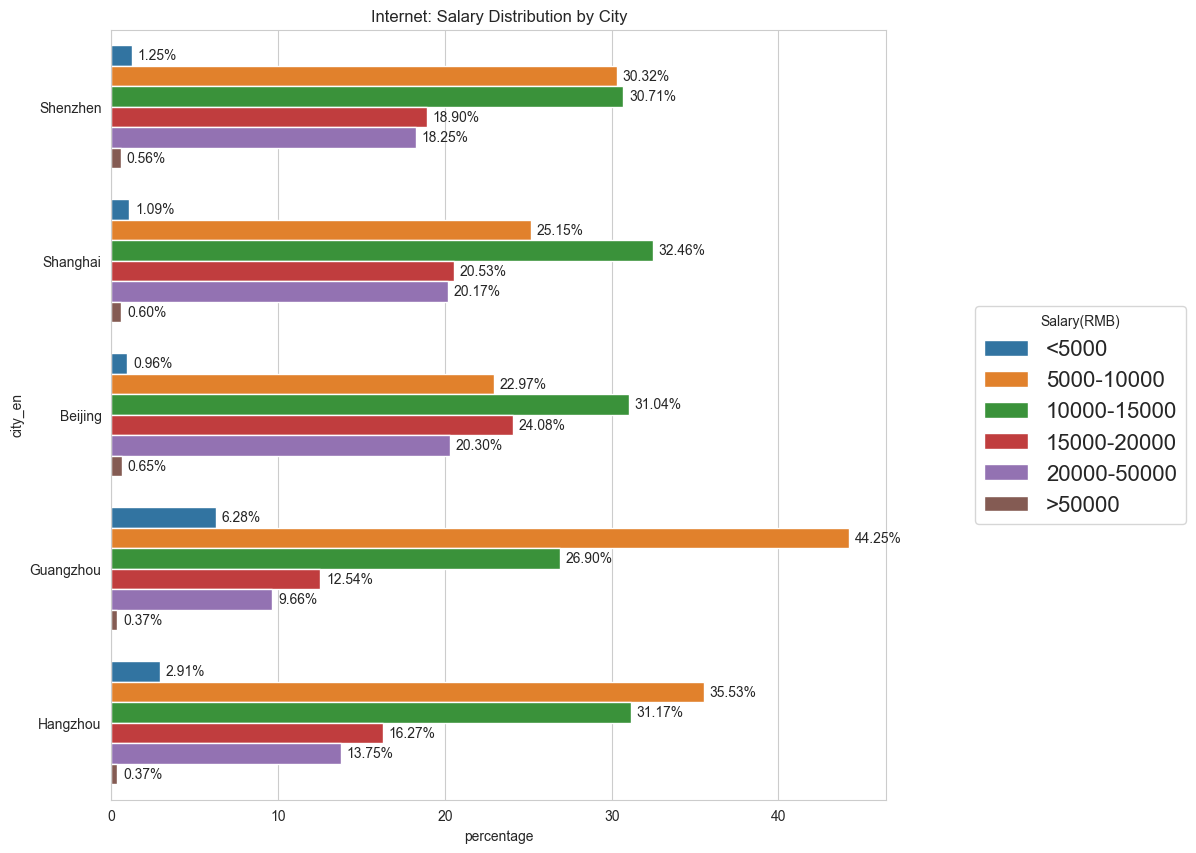

In [357]:
df = pd.read_csv('Internet_cleaned_file.csv')
# Set plot style
sns.set_style("whitegrid")

# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, figsize=(10, 10), sharex=True)

# Set plot title and axis labels for each subplot
ax.set_title('Internet: Salary Distribution by City', fontsize=12)
ax.set_ylabel('City', fontsize=10)

# Group data by Industry and Scale, and count the number of companies in each group
grouped = df.groupby(['city_en', 'salary_label'])['salary_label'].count()

# Convert the grouped data to a DataFrame and reset the index
grouped_df = grouped.to_frame(name='count').reset_index()

industry_counts = grouped_df.groupby('city_en')['count'].sum()
grouped_df['percentage'] = grouped_df['count'] / grouped_df['city_en'].map(industry_counts) * 100

# Set the order of the scales for plotting
salary_order = ['<5000', '5000-10000','10000-15000','15000-20000', '20000-50000','>50000']
grouped_df = grouped_df.sort_values(['city_en', 'percentage'], ascending=[False, True])

# Create the bar plots for each subplot
sns.barplot(x='percentage', y='city_en', hue='salary_label', order=df['city_en'].value_counts().index[:10], hue_order=salary_order, data=grouped_df, ax=ax)

# Add percentage values to each bar
formatted_labels = [f'{val:.2f}%' for val in grouped_df['percentage'].values]

# Add the formatted labels to the plot
for container in ax.containers:
    if container is not None:
        labels = [f'{val:.2f}%' for val in container.datavalues]
        ax.bar_label(container, label_type='edge', labels=labels, padding=4, fontsize=10)

# Add a legend to each subplot
ax.legend(title='Salary(RMB)', title_fontsize=10,bbox_to_anchor=(1.1, 0.5), fontsize=16, loc='center left')

# Set the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()


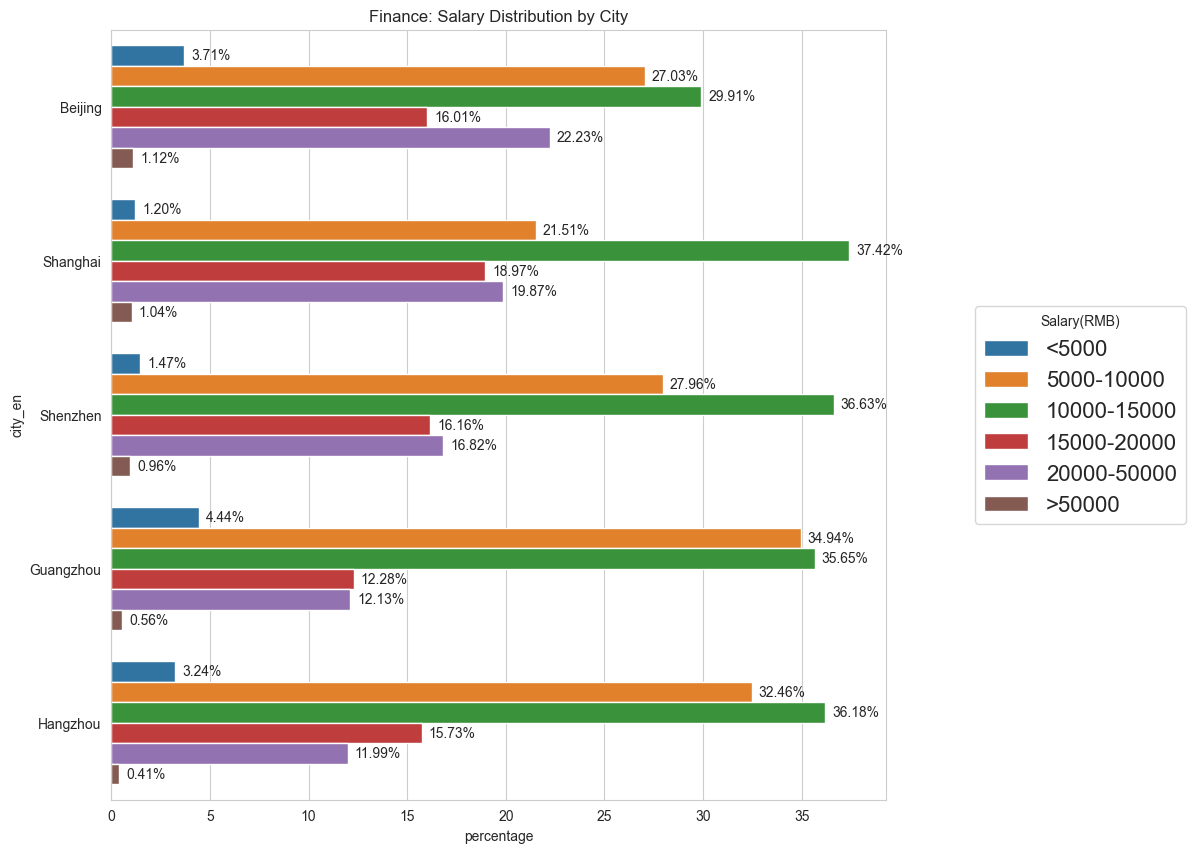

In [358]:
df = pd.read_csv('Finance_cleaned_file.csv')
# Set plot style
sns.set_style("whitegrid")

# Set figure size and create subplots
fig, ax = plt.subplots(nrows=1, figsize=(10, 10), sharex=True)

# Set plot title and axis labels for each subplot
ax.set_title('Finance: Salary Distribution by City', fontsize=12)
ax.set_ylabel('City', fontsize=10)

# Group data by Industry and Scale, and count the number of companies in each group
grouped = df.groupby(['city_en', 'salary_label'])['salary_label'].count()

# Convert the grouped data to a DataFrame and reset the index
grouped_df = grouped.to_frame(name='count').reset_index()

industry_counts = grouped_df.groupby('city_en')['count'].sum()
grouped_df['percentage'] = grouped_df['count'] / grouped_df['city_en'].map(industry_counts) * 100

# Set the order of the scales for plotting
salary_order = ['<5000', '5000-10000','10000-15000','15000-20000', '20000-50000','>50000']
grouped_df = grouped_df.sort_values(['city_en', 'percentage'], ascending=[False, True])

# Create the bar plots for each subplot
sns.barplot(x='percentage', y='city_en', hue='salary_label', order=df['city_en'].value_counts().index[:10], hue_order=salary_order, data=grouped_df, ax=ax)

# Add percentage values to each bar
formatted_labels = [f'{val:.2f}%' for val in grouped_df['percentage'].values]

# Add the formatted labels to the plot
for container in ax.containers:
    if container is not None:
        labels = [f'{val:.2f}%' for val in container.datavalues]
        ax.bar_label(container, label_type='edge', labels=labels, padding=5, fontsize=10)

# Add a legend to each subplot
ax.legend(title='Salary(RMB)', title_fontsize=10,bbox_to_anchor=(1.1, 0.5), fontsize=16, loc='center left')

# Set the spacing between the subplots
plt.subplots_adjust(hspace=0.4)

# Show the plot
plt.show()
